## 📌 Caso de Estudio  

Contamos con información del **Banco XXXX** y queremos analizar el **rango de edades** de nuestros clientes.  

### ❓ ¿Por qué es importante?  

Determinar estos rangos nos permitirá profundizar en el análisis y obtener información clave sobre:  

✅ La distribución de edades de nuestros clientes.  
✅ Identificación de grupos predominantes.  
✅ Posibles patrones de comportamiento financiero según la edad.  

Con esta información, podremos tomar decisiones más estratégicas y diseñar análisis más precisos. 📊  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_banco = pd.read_csv("data/bank.csv", delimiter=";")
df_banco.head()

,edad,trabajo,marital,educacion,predeterminado,equilibrio,vivienda,prestamo,contacto,dia,mes,duracion,campaña,pdays,anterior,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Análisis de Rangos de Edades  

En esta sección analizaremos la distribución de las edades de nuestros clientes con el objetivo de:  

✔️ **Identificar patrones** – Determinar si la distribución de edades es homogénea o si existen grupos predominantes.  

📊 **Evaluar la segmentación** – Comprender si nuestros clientes se concentran en ciertos rangos de edad o si la distribución es uniforme.  

Este análisis nos permitirá obtener información clave sobre nuestro público objetivo y su composición por edades.  


(array([ 188., 1284., 1095.,  926.,  607.,  332.,   41.,   34.,   14.]),
 array([19.        , 26.55555556, 34.11111111, 41.66666667, 49.22222222,
        56.77777778, 64.33333333, 71.88888889, 79.44444444, 87.        ]),
 <BarContainer object of 9 artists>)

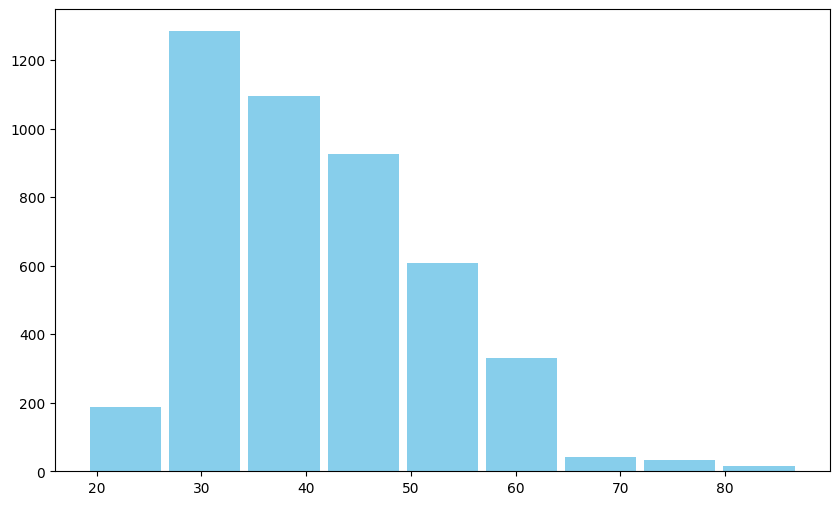

In [3]:
df_edad_rango = df_banco["edad"]

plt.figure(figsize=(10, 6))  
plt.hist(df_edad_rango, bins=9,  rwidth=0.9, color='skyblue', histtype="bar")

## Análisis de Distribución de Edades  

Con esta gráfica estamos encontrando lo siguiente:  

📌 **Distribución Exponencial** – La distribución de las edades sigue un patrón exponencial, donde la mayoría de nuestros clientes tienen entre **26 y 50 años**.  

📊 **Segmento Destacado** – El rango de **26-34 años** representa la mayor cantidad de clientes.  

📉 **Tendencia Descendente** – A medida que aumenta la edad, la cantidad de clientes disminuye, indicando que tenemos menos clientes en edades más avanzadas.  

___

### Hacer más preciso los rangos de Edades:

En esta seccion queremos identificar los rangos exactos de edades, partiendo del histograma.  
Para ello realizamos lo siguiente:  

1. Usando np.histogram de nunpy

2. Creamos un nuevo dataFrame en base a los rangos y sus totales.  

3. Gaficamos los datos.  

<BarContainer object of 9 artists>

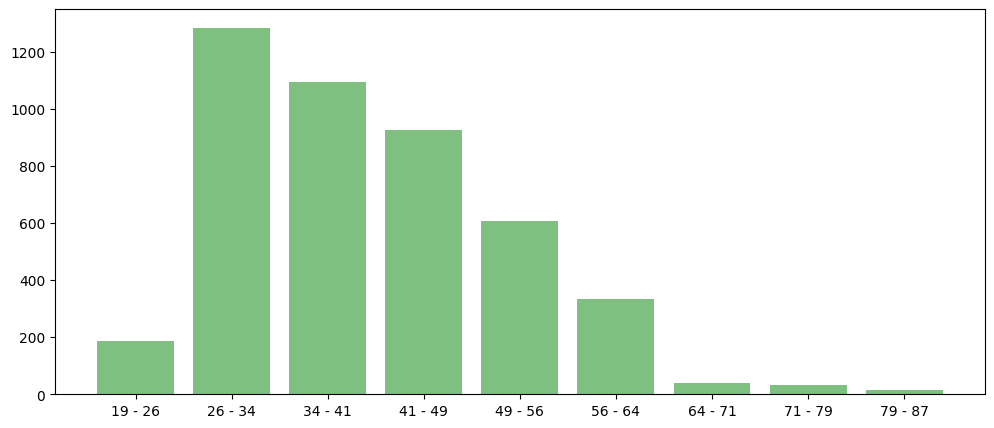

In [4]:
#1: Esto me permite distribuir en las 2 variables el total de cada rango y en la otra los rangos
#counts: contiene la cantidad de datos que cae en cada rango
#bins: contiene los límites de cada rango

counts, bins = np.histogram(df_edad_rango, bins=9)

#2 Convertirlo en un DataFrame:
# Usando las 2 variables anteriores podemos crear el dataframe donde por un lado armamos el rango específico 
# recorriendo los rangos y en el otro asignamos el total
df_histograma = pd.DataFrame({
    "Rango de Edad": [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)],
    "Frecuencia": counts
})
df_histograma.reset_index(drop=True)

#3 Creamos el gráfico mostrándonos los rangos reales
plt.figure(figsize=(12,5))
plt.bar(df_histograma["Rango de Edad"], df_histograma["Frecuencia"], color="green",  alpha=0.5)
 

## 🔍 Identificación de Rangos por Cliente  

### ❓ Pero, ¿cómo identificamos el rango de edad de cada cliente?  

Si queremos conocer a qué rango pertenece cada persona dentro de nuestro conjunto de datos, podemos asignar una nueva columna en nuestro _DataFrame_ original que indique su categoría de edad.  

### 🛠 ¿Cómo lo hacemos?  

1️⃣ **Definir los límites** (_bins_) de cada rango de edad.  

2️⃣ **Crear la estructura de los rangos**, por ejemplo: `19-26`, `26-34`, etc.  

3️⃣ **Asignar la clasificación** en una nueva columna dentro del _DataFrame_ original.  

De esta manera, cada cliente tendrá su respectivo rango de edad asignado, lo que facilitará futuros análisis y segmentaciones. 📊  


In [5]:
#1 Creamos los 10 valores que representaran los bordes de los 9 bins que son: [19., 26.55555556, 34.11111111, 41.66666667, 49.22222222, 56.77777778,
#  64.33333333, 71.88888889, 79.44444444, 87.] Con esto armamos los rangos que se haran en el segundo punto

bins = np.linspace(df_edad_rango.min(), df_edad_rango.max(), num=10)  # 9 bins → 10 bordes


#2 Aqui recorremos cada bin y armamos los rangos, solo que convertimos a todos en enteros 
labels = [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)]


#3 Crear una nueva columna en el DataFrame con el rango de edad asignado a cada persona
df_banco["Rango_Edad"] = pd.cut(df_banco["edad"], bins=bins, labels=labels, include_lowest=True)

df_banco.head()


,edad,trabajo,marital,educacion,predeterminado,equilibrio,vivienda,prestamo,contacto,dia,mes,duracion,campaña,pdays,anterior,poutcome,y,Rango_Edad
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,26 - 34
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,26 - 34
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,34 - 41
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,26 - 34
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,56 - 64


## Interpretación de los Rangos de Edad  

Como pudimos observar, ya tenemos definidos nuestros rangos de edad. Ahora, ¿para qué podemos utilizarlos?  

### 📌 Objetivo:  

Si queremos profundizar más en el análisis de estos rangos, podemos responder preguntas clave, como:  

✅ **Del rango de 26-34 años**, que representa la mayor cantidad de clientes, ¿qué porcentaje obtuvo un préstamo y qué porcentaje no?  

Para ello, seguimos los siguientes pasos:  

1️⃣ **Filtrar** el conjunto de datos por el rango identificado.  

2️⃣ **Realizar el conteo** en función de la columna _préstamo_.  

3️⃣ **Generar un nuevo DataFrame** con los valores respectivos.  

4️⃣ **Visualizar los datos** con un gráfico de torta para analizar la distribución porcentual.  


([<matplotlib.patches.Wedge at 0x1572aed4bc0>,
 [Text(-0.5406502475229716, -0.9579651924017646, 'no'),
  Text(0.5406499353782627, 0.9579653685679251, 'yes')],
 [Text(-0.29490013501252993, -0.5225264685827806, '83.6%'),
  Text(0.2948999647517796, 0.5225265646734136, '16.4%')])

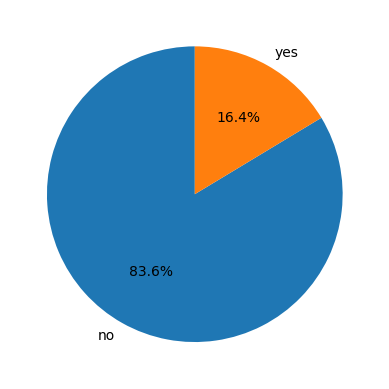

In [6]:
#1
df_edad_filtrada = df_banco[df_banco["Rango_Edad"] == "26 - 34"]

#2
df_prestamos_edad= df_edad_filtrada["prestamo"].value_counts().reset_index()

#3
df_prestamos_edad.columns = ["Prestamo", "Total"]
df_prestamos_edad

#4
fig, ax= plt.subplots()
ax.pie(df_prestamos_edad["Total"], 
       labels=df_prestamos_edad["Prestamo"],
       autopct="%1.1f%%",
       startangle=90
       )

Como podemos ver a pesar de que nuestro grueso de clientes esta entre los 26 – 34 años, sólo el 16.4% cuenta con un préstamo.

#### 📌 Sigamos Analizando Más a Detalle  

### 📊 Identifiquemos a las Personas que No Obtuvieron un Préstamo  

En este análisis, nos enfocaremos en las personas a las que no se les otorgó un préstamo y su relación con la distribución de edades según su ocupación.  

### 🎯 Objetivo  

1️⃣ Examinar cómo se distribuyen las edades dentro de cada categoría laboral.  

2️⃣ Utilizar un **gráfico de caja (boxplot)** para visualizar el rango de edades en cada tipo de trabajo.  

3️⃣ Detectar posibles **valores atípicos** y patrones en la distribución.  

Este análisis nos permitirá entender si ciertos grupos etarios dentro de una ocupación tienen mayores dificultades para acceder a un préstamo y cómo se comporta la distribución en cada caso. 📈  



C:\Users\Joan\AppData\Local\Temp\ipykernel_27192\87405196.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grupo_edad,  labels= trabajo )


{'whiskers': [<matplotlib.lines.Line2D at 0x1572af21700>,
 'caps': [<matplotlib.lines.Line2D at 0x1572af21c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1572ae99b80>,
 'medians': [<matplotlib.lines.Line2D at 0x1572af22120>,
 'fliers': [<matplotlib.lines.Line2D at 0x1572af223c0>,
 'means': []}

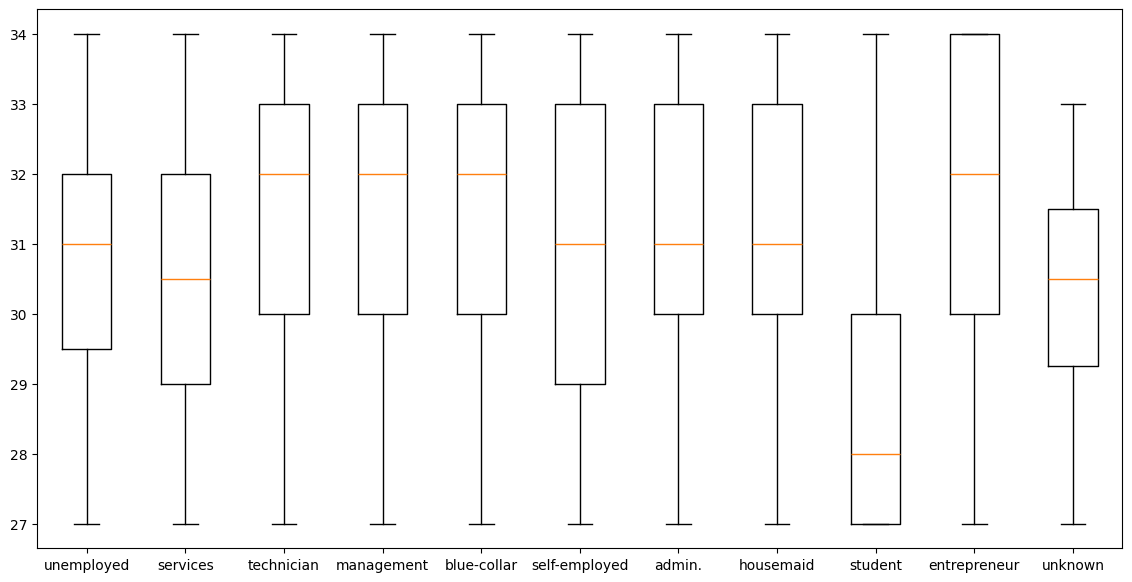

In [7]:
#Filtramos a los del rango de edad entre 26 - 34 y de esos los que no tuvieron un prestamo
df_filtro_sin_prestamo = df_banco[(df_banco["Rango_Edad"] == "26 - 34") & (df_banco["prestamo"] == "no")]

#Modificamos el dataframe para quedarnos con las 2 columnas que nos interesa
df_filtro_sin_prestamo = df_filtro_sin_prestamo[["edad", "trabajo"]]

# Agrupamos las edades según el tipo de trabajo, generando una lista de Series (una por cada tipo de trabajo)
grupo_edad = [df_filtro_sin_prestamo[df_filtro_sin_prestamo["trabajo"] == trabajo]["edad"]
              for trabajo in df_filtro_sin_prestamo["trabajo"].unique()]
 
# Extraemos los nombres únicos de los tipos de trabajo para usarlos como etiquetas en el gráfico
trabajo = df_filtro_sin_prestamo["trabajo"].unique() 

#Creamos el grafico de boxplot, para ver la distribución de edades por el tipo de trabajo.
plt.figure(figsize=(14,7))
plt.boxplot(grupo_edad,  labels= trabajo )

## 🔍 Análisis de Sectores Laborales y su Relación con la Distribución de Edades  

A través de este análisis, podemos obtener información clave sobre nuestros clientes y su comportamiento financiero.  

### 📊 ¿Qué podemos descubrir?  

🔹 **Tipo de Sectores Laborales**  
   Identificamos en qué sectores se desempeñan nuestros clientes y cómo se distribuyen.  

🔹 **Distribución de Edades**  
   La mayoría de los sectores laborales presentan distribuciones similares, aunque algunos abarcan un rango más amplio de edades.  

🔹 **Comportamiento Atípico**  
   Un caso particular es el sector de **Estudiantes**, donde la distribución de edades es significativamente menor, lo cual es esperable.  

🔹 **Rechazo a Préstamos**  
   Conociendo los sectores laborales, podemos inferir posibles razones por las cuales ciertos clientes no recibieron préstamos.  
   - Personas **sin trabajo**, **estudiantes** y aquellos en **sectores desconocidos** pueden haber tenido más dificultades para calificar.  




### 🔍 Profundizando en el Análisis  

Al contar con esta información, podemos llevar el análisis un paso más allá y determinar:  

✅ **El total de personas pertenecientes a cada sector laboral** y su impacto en la aprobación de préstamos. 📈  

### 📊 Identificar el Total de Personas por Tipo de Trabajo  

Para ello, podemos generar una **gráfica de barras** que nos permita visualizar:  

1️⃣ La cantidad total de personas en cada sector laboral.  

2️⃣ Identificar patrones o tendencias que nos ayuden a entender qué perfiles de clientes podrían ser más propensos a obtener un préstamo en el futuro.  

Este enfoque nos permite segmentar mejor a nuestros clientes y diseñar estrategias más efectivas. 🚀  



<BarContainer object of 11 artists>

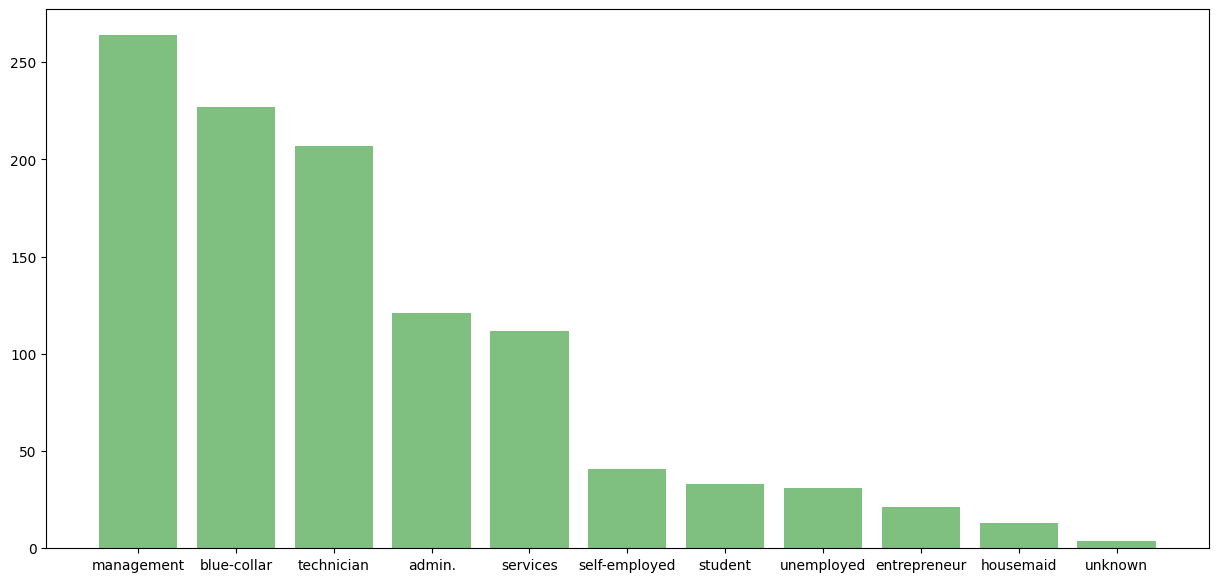

In [8]:
df_trabajo = df_filtro_sin_prestamo["trabajo"].value_counts().reset_index()

fig, ax = plt.subplots(figsize = (15, 7))
plt.bar(df_trabajo["trabajo"], df_trabajo["count"], color= "green", alpha=0.5)

## 📊 Análisis de los Sectores Laborales y su Composición de Clientes  

A partir del análisis, encontramos la siguiente distribución de clientes por sector laboral:  

Mayores clientes:
- **Management:** +250 clientes.  
- **Obreros:** +210 clientes.  
- **Técnicos:** +200 clientes.  

Menores clientes:
- **Emprendedores:** 25 clientes.  
- **Trabajadoras del hogar:** 20 clientes.  
- **Desconocidos** 10 clientes.

🔍 **Interpretación:**  
Con esta información más clara, podemos desarrollar estrategias más precisas para:  
1. **Atender y priorizar** a los sectores con mayor cantidad de clientes.  
2. **Identificar oportunidades** para ofrecer préstamos más accesibles a sectores específicos.  

Este análisis nos permite orientar mejor nuestros esfuerzos y maximizar el impacto de nuestras estrategias financieras. 🚀  

